##Import all Modules


In [ ]:
! pip install pandas numpy matplotlib scikit-learn keras tensorflow






import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout

##Read the Dataset


In [ ]:
df = pd.read_csv("/content/btc.csv") # Change the path for the csv file accordingly

In [ ]:
df.head()


,Date,Open,Close,High,Low
0,15-03-2025,84589.7,84272.4,84679.5,83636.4
1,14-03-2025,81891.2,84479.0,84679.5,83974.2
2,13-03-2025,83576.2,81809.9,82241.1,80833.2
3,12-03-2025,82123.0,83632.9,84292.0,83357.2
4,11-03-2025,79510.0,82222.1,83750.2,82146.1


##Split into Training & Testing Set


In [ ]:
df = df.dropna()  # Drop rows with missing values
df = df.reset_index(drop=True)  # Reset index after dropping rows
dataframe_training, dataframe_testing, y_train, y_test = train_test_split(
    df, df, test_size=0.2, random_state=42
)

##Pre-processing of Training Set


In [ ]:
training_set = dataframe_training.iloc[:,1:2].values

In [ ]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

##Pre-processing of Testing Set


In [ ]:
testing_set = dataframe_testing.iloc[:,1:2].values
dataframe_testing.head()

,Date,Open,Close,High,Low
327,22-04-2024,65711.6,66515.8,67180.0,66499.9
33,10-02-2025,96938.9,98069.6,98115.4,97434.0
15,28-02-2025,84290.5,86074.4,86546.3,83837.3
314,05-05-2024,63238.0,63816.5,64459.5,63722.0
57,17-01-2025,101480.0,103429.0,104661.0,102729.0


In [ ]:

dataframe_training.head()


,Date,Open,Close,High,Low
192,04-09-2024,56653.4,57118.7,58318.9,56956.4
75,30-12-2024,93260.9,92408.6,92863.2,92036.2
84,21-12-2024,97585.2,96219.2,97422.2,96194.9
359,21-03-2024,66746.4,65947.2,66133.9,65151.8
16,27-02-2025,84737.3,80505.0,84876.3,79535.1


##Number of timesteps


In [ ]:
timesteps = 60

In [ ]:
X_train = []
Y_train = []

for i in range(timesteps, len(training_set_scaled)):
    #APPEND INTO X_TRAIN: ROWS, COLUMN
    X_train.append(training_set_scaled[i-timesteps:i, 0]) #MEMORY
    Y_train.append(training_set_scaled[i, 0]) #PREDICTIONS

##Convert to Numpy Array


In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
print(X_train.shape)
print(X_train)
print(len(X_train))


(236, 60)
[[0.07061732 0.75310412 0.8337236  ... 0.82630354 0.84496555 0.27387469]
 [0.75310412 0.8337236  0.25878475 ... 0.84496555 0.27387469 0.62005951]
 [0.8337236  0.25878475 0.59419558 ... 0.27387469 0.62005951 0.2474701 ]
 ...
 [0.06950804 0.18737509 0.14676985 ... 0.0274915  0.81895992 0.80899505]
 [0.18737509 0.14676985 0.81699864 ... 0.81895992 0.80899505 0.23523819]
 [0.14676985 0.81699864 0.92192161 ... 0.80899505 0.23523819 0.34427574]]
236


##Reshape to add new dimension


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##Construct the RNN


In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(
    units = 50,
    return_sequences=True,
    input_shape = (X_train.shape[1], 1)
    ))

regressor.add(Dropout(
    rate = 0.2
))

regressor.add(LSTM(
    units = 50,
    return_sequences=True,
    ))

regressor.add(Dropout(
    rate = 0.2
  ))

regressor.add(LSTM(
    units = 50,
    return_sequences=True,
    ))

regressor.add(Dropout(
    rate = 0.2
  ))


regressor.add(LSTM(
    units = 50,
    return_sequences=False,
    ))

regressor.add(Dropout(
    rate = 0.2
  ))


#FINAL - OUTPUT LAYER
regressor.add(Dense(
    units = 1
    ))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##Compile RNN


In [ ]:
regressor.compile(
    optimizer = "adam", #ALWAYS A SAFE CHOICE; RNN, ANN
    loss  = "mean_squared_error" #MSE FOR REGRESSION
    )

##Fit RNN


In [ ]:
regressor.fit(
    X_train,
    Y_train,
    epochs = 30,
    batch_size =  32
    )
# The epochs can be changed modified according to our need, for this model we have taken epochs = 5

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - loss: 0.1680
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0932
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0963
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0924
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.1004
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - loss: 0.0872
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0943
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0843
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.0868
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0868
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0886
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0889
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0949
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0934
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 0.0915
Epoch 16/30
8/8 ━━━

##Making Predictions


In [ ]:
df_prediction = pd.concat(
    (dataframe_training['Open'], dataframe_testing['Open']),
    axis=0  # ROWS; NOT COLUMNS
)


In [ ]:
inputs = df_prediction[len(df_prediction)-len(dataframe_testing)-60:].values

In [ ]:
inputs = np.reshape(inputs, (-1, 1))
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
     #APPEND INTO X_TRAIN: ROWS, COLUMN
     X_test.append(inputs[i-60:i, 0]) #MEMORY


## BACKTESTING

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


<ipython-input-36-b3e6a87550f1>:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


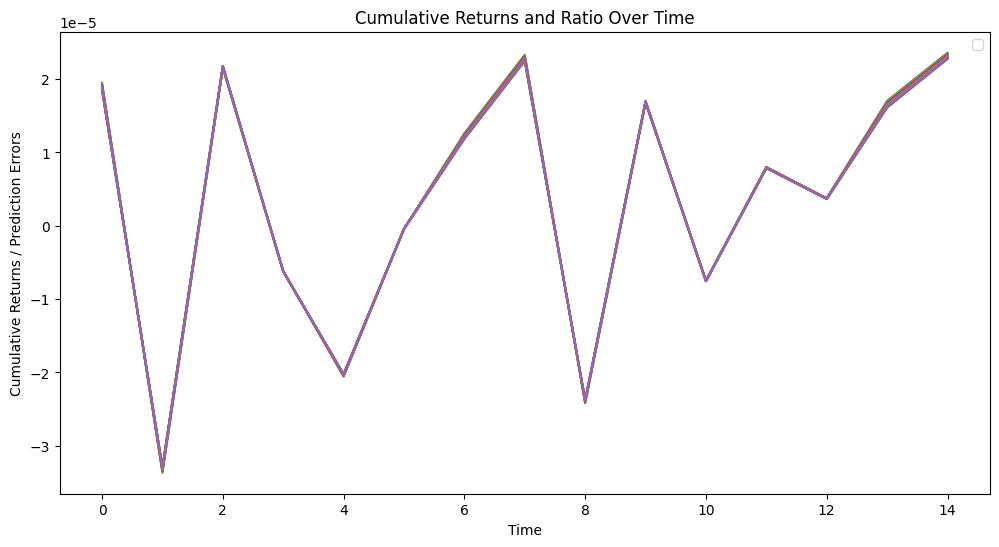

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_prices = regressor.predict(X_test)

# Inverse transform the predicted prices to get them in the original scale
predicted_prices = sc.inverse_transform(predicted_prices)

actual_prices = testing_set[timesteps:]
returns = (actual_prices[1:] - actual_prices[:-1]) / actual_prices[:-1]

# Calculate trading signals based on predicted price changes
predicted_returns = (predicted_prices[1:] - predicted_prices[:-1]) / predicted_prices[:-1]
buy_signals = predicted_returns > 0  # Buy when the model predicts a positive return

# Assuming a constant transaction cost and slippage for simplicity
transaction_cost = 0.0015
slippage = 0.002

# Ensure buy_signals has the same length as returns
buy_signals = buy_signals[:len(returns)]

buy_signals_expanded = np.expand_dims(buy_signals, axis=-1)

adjusted_returns = returns - (buy_signals_expanded * transaction_cost) - (buy_signals_expanded * slippage)

# Reshape predicted_prices to match the shape of actual_prices
predicted_prices = predicted_prices[:len(actual_prices)].flatten()

# Calculate errors
errors = actual_prices - predicted_prices

# Calculate cumulative returns
cumulative_returns = np.cumprod(1 + adjusted_returns) - 1

# Trim the longer array to match the length of the shorter array
min_length = min(len(cumulative_returns), len(errors))
cumulative_returns_trimmed = cumulative_returns[:min_length]
errors_trimmed = errors[:min_length]

# Reshape cumulative_returns_trimmed to be a 2D array
cumulative_returns_trimmed = cumulative_returns_trimmed.reshape(-1, 1)

# Calculate the ratio of cumulative returns to prediction errors
y = cumulative_returns_trimmed / errors_trimmed

# Flatten errors_trimmed to make it 1D
errors_flat = errors_trimmed.flatten()

# Plot cumulative returns and scatter plot of errors
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Cumulative Returns / Prediction Errors')
plt.title('Cumulative Returns and Ratio Over Time')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


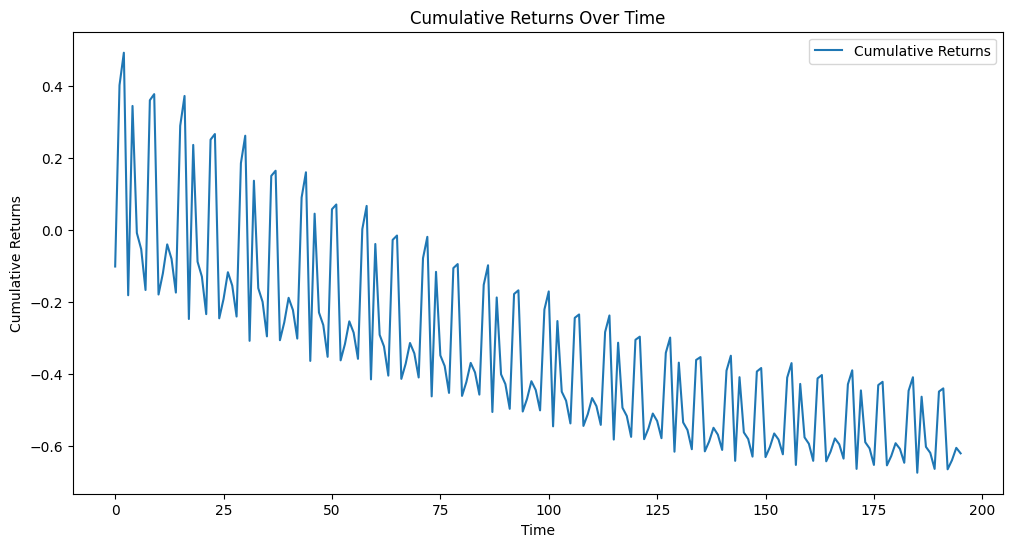

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_prices = regressor.predict(X_test)

predicted_prices = sc.inverse_transform(predicted_prices)

actual_prices = testing_set[timesteps:]

returns = (actual_prices[1:] - actual_prices[:-1]) / actual_prices[:-1]

predicted_returns = (predicted_prices[1:] - predicted_prices[:-1]) / predicted_prices[:-1]
buy_signals = predicted_returns > 0

transaction_cost = 0.0015
slippage = 0.002

buy_signals = buy_signals[:len(returns)]

buy_signals_expanded = np.expand_dims(buy_signals, axis=-1)

adjusted_returns = returns - (buy_signals_expanded * transaction_cost) - (buy_signals_expanded * slippage)

cumulative_returns = np.cumprod(1 + adjusted_returns) - 1

plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label='Cumulative Returns')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.show()


## RISK MANAGEMENT

<ipython-input-38-b2820b090ed9>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  positions[i] = position_size_btc / actual_prices[i]
<ipython-input-38-b2820b090ed9>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


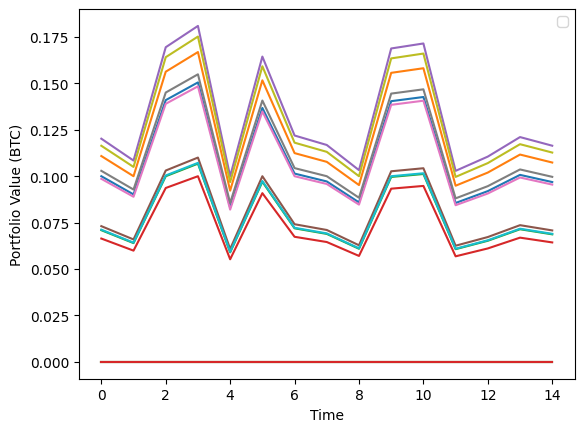

In [ ]:
stop_loss_ratio = 0.02  # 2% stop-loss ratio

positions = np.zeros(len(adjusted_returns))
capital = 1.0  # Initial capital is set to 1 BTC for simplicity
position_size = 0.1  # Example: Allocate 10% of capital to each trade

# Loop through each time step
for i in range(len(adjusted_returns)):

    position_size_btc = capital * position_size

    # Check if the model predicts a positive return (buy signal)
    if buy_signals[i]:

        positions[i] = position_size_btc / actual_prices[i]

    # Check if stop-loss condition is met (sell signal)
    elif positions[i-1] * (1 - stop_loss_ratio) > actual_prices[i]:
        positions[i] = 0

portfolio_value = positions * actual_prices

plt.plot(portfolio_value)
plt.xlabel('Time')
plt.ylabel('Portfolio Value (BTC)')
plt.legend()
plt.show()


## VALUES

In [ ]:
# Calculate metrics
gross_profit = np.sum(adjusted_returns[adjusted_returns > 0])
gross_loss = -np.sum(adjusted_returns[adjusted_returns < 0])
net_profit = gross_profit - gross_loss
total_closed_trades = np.sum(buy_signals)
win_rate = np.sum(adjusted_returns > 0) / total_closed_trades
max_drawdown = np.min(np.cumsum(adjusted_returns))
average_winning_trade = gross_profit / np.sum(adjusted_returns > 0)
average_losing_trade = gross_loss / np.sum(adjusted_returns < 0)
buy_and_hold_return = (actual_prices[-1] - actual_prices[0]) / actual_prices[0]
largest_losing_trade = np.min(adjusted_returns)
largest_winning_trade = np.max(adjusted_returns)
sharpe_ratio = np.sqrt(252) * np.mean(adjusted_returns) / np.std(adjusted_returns)
sortino_ratio = np.sqrt(252) * np.mean(adjusted_returns) / np.std(adjusted_returns[adjusted_returns < 0])
average_holding_duration = np.mean(np.diff(np.where(buy_signals)[0])) if np.sum(buy_signals) > 0 else 0
benchmark_return = (actual_prices[-1] - actual_prices[0]) / actual_prices[0]
risk_reward_ratio = np.mean(adjusted_returns) / np.std(adjusted_returns)
trade_durations = np.diff(np.where(buy_signals)[0])
max_duration_time = np.max(trade_durations) if len(trade_durations) > 0 else 0


print(f"Gross Profit: {gross_profit}")
print(f"Gross Loss: {gross_loss}")
print(f"Net Profit: {net_profit}")
print(f"Total Closed Trades: {total_closed_trades}")
print(f"Win Rate: {win_rate}")
print(f"Max Drawdown: {max_drawdown}")
print(f"Average Winning Trade (in USDT): {average_winning_trade}")
print(f"Average Losing Trade (in USDT): {average_losing_trade}")
print(f"Buy and Hold Return of BTC: {buy_and_hold_return}")
print(f"Largest Losing Trade (in USDT): {largest_losing_trade}")
print(f"Largest Winning Trade (in USDT): {largest_winning_trade}")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Sortino Ratio: {sortino_ratio}")
print(f"Average Holding Duration per Trade: {average_holding_duration} days")
print(f"Benchmark Return: {benchmark_return}")
print(f"Risk-Reward Ratio: {risk_reward_ratio}")
print(f"Max Duration Time of Single Trade: {max_duration_time} days")

Gross Profit: 29.08275045383355
Gross Loss: 19.844998822564293
Net Profit: 9.237751631269258
Total Closed Trades: 10
Win Rate: 9.8
Max Drawdown: -0.10148533459298678
Average Winning Trade (in USDT): 0.29676275973299543
Average Losing Trade (in USDT): 0.20249998798534993
Buy and Hold Return of BTC: [-0.03146306]
Largest Losing Trade (in USDT): -0.4508076175670424
Largest Winning Trade (in USDT): 0.6442018806991884
Sharpe Ratio: 2.23240649126626
Sortino Ratio: 4.756500496650443
Average Holding Duration per Trade: 1.0 days
Benchmark Return: [-0.03146306]
Risk-Reward Ratio: 0.140628390502305
Max Duration Time of Single Trade: 1 days
